In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df= pd.read_csv(r"C:\Users\saksh\OneDrive\Documents\intellipant\Capstone project\Walmart sales forcast\Walmart (1).csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


<Axes: >

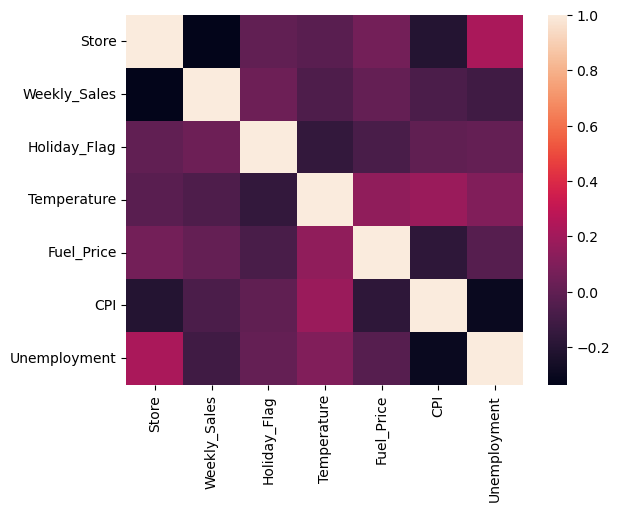

In [6]:
sns.heatmap(df.corr())

In [7]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True,format='%d-%m-%Y')

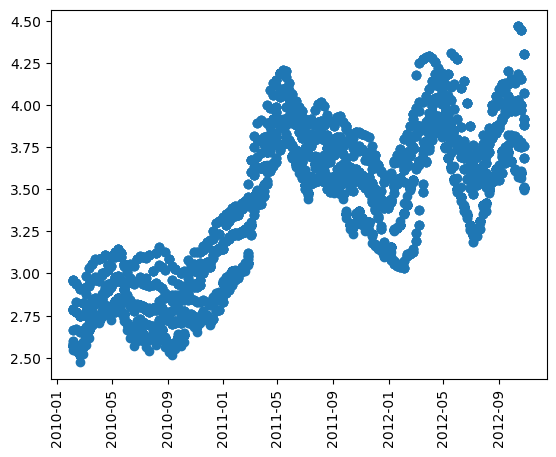

In [8]:
plt.scatter(df['Date'],df['Fuel_Price'])
plt.xticks(rotation = 90)
plt.show()

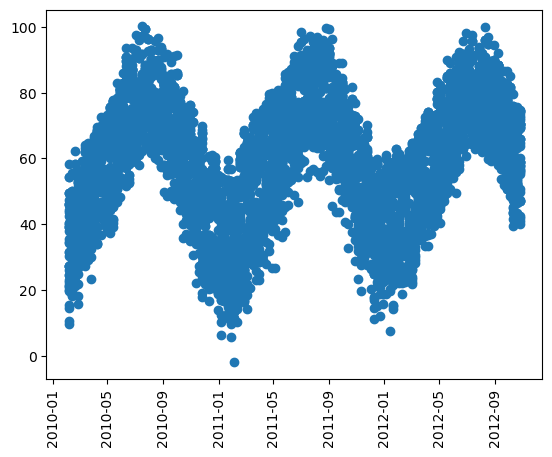

In [9]:

plt.scatter(df['Date'],df['Temperature'])
plt.xticks(rotation = 90)
plt.show()

In [10]:
df_mean = pd.DataFrame(df.groupby(['Date'])['Weekly_Sales'].mean())
df_mean.head()

,Weekly_Sales
Date,
2010-02-05,1.105572e+06
2010-02-12,1.074148e+06
2010-02-19,1.072822e+06
2010-02-26,9.770794e+05
2010-03-05,1.041588e+06


<Axes: xlabel='Date'>

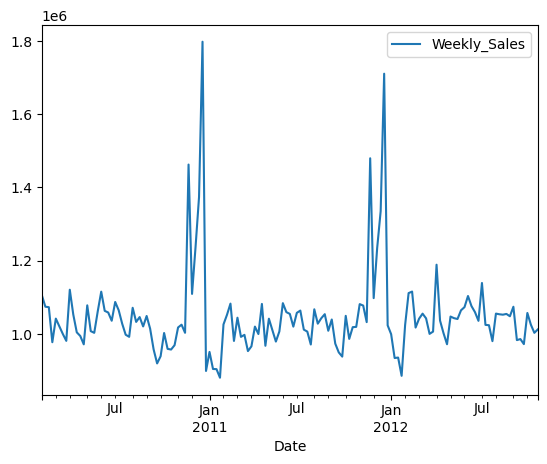

In [11]:
df_mean.plot()

In [12]:
df_mean['Date'] =df_mean.index
df_mean['month'] =df_mean['Date'].dt.month
df_mean['year'] =df_mean['Date'].dt.year
df_mean.head()


,Weekly_Sales,Date,month,year
Date,,,,
2010-02-05,1.105572e+06,2010-02-05,2,2010
2010-02-12,1.074148e+06,2010-02-12,2,2010
2010-02-19,1.072822e+06,2010-02-19,2,2010
2010-02-26,9.770794e+05,2010-02-26,2,2010
2010-03-05,1.041588e+06,2010-03-05,3,2010


<Axes: xlabel='month'>

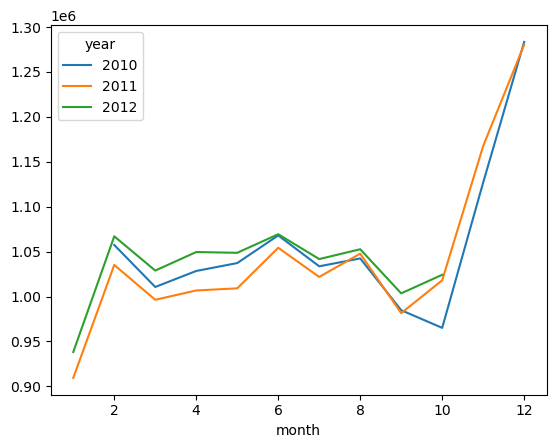

In [13]:
monthly_sales = pd.pivot_table(df_mean, values = "Weekly_Sales", columns = "year" ,index = "month")
monthly_sales.plot()

In [14]:
df_mean = df_mean.iloc[:,[0]]
df_mean

,Weekly_Sales
Date,
2010-02-05,1.105572e+06
2010-02-12,1.074148e+06
2010-02-19,1.072822e+06
2010-02-26,9.770794e+05
2010-03-05,1.041588e+06
...,...
2012-09-28,9.718867e+05
2012-10-05,1.057036e+06
2012-10-12,1.025078e+06


# Tried removing Outlier- by limiting max value to upper limit of IQR and min value to lower limit of IQR 

col = list(df_mean.columns)

for col_name in col:
    if(df_mean[col_name].dtypes=='int64' or df_mean[col_name].dtypes=='float64'):
        plt.boxplot(df_mean[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

Q1 = df_mean['Weekly_Sales'].quantile(0.25)
Q3 = df_mean['Weekly_Sales'].quantile(0.75)
IQR = Q3-Q1
LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR
print(LL,UL)
for i in df_mean['Weekly_Sales'].values:
    print(i)

#df_mean = df_mean[(df_mean['Weekly_Sales'] >= Q1 - 1.5*IQR) & (df_mean['Weekly_Sales'] <= Q3 + 1.5*IQR)]
#df_mean
val = list(df_mean['Weekly_Sales'].values)
for i in range(0,143):
    if val[i] > UL:
        val[i] = UL
    elif val[i] < LL:
        val[i] = LL

df_mean['Weekly_Sales'] = val
df_mean

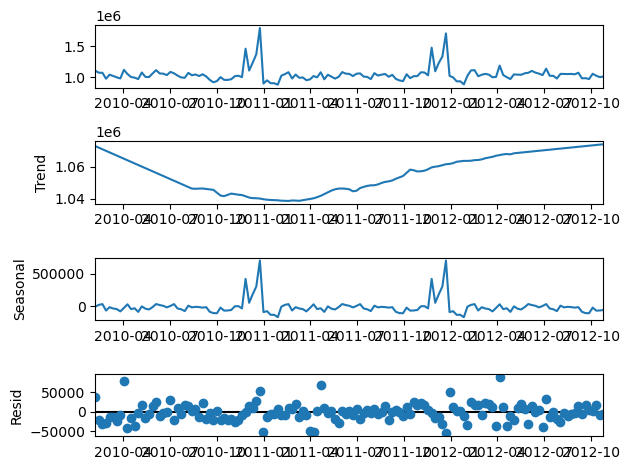

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_mean,period=52,extrapolate_trend=1)
decomposition.plot();

In [16]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
print('P-value       :',adfuller(df_mean['Weekly_Sales'])[1])

P-value       : 2.6759791589860825e-07


# Tried implementing Robust Scale as Dataset has outliers

from sklearn.preprocessing import RobustScaler


scale = RobustScaler()
X= scale.fit_transform(df_mean)

df_mean['Weekly_Sales'] = X
df_mean


df_mean.plot()

In [17]:
X = np.log(df_mean)

<Axes: xlabel='Date'>

<Figure size 2000x700 with 0 Axes>

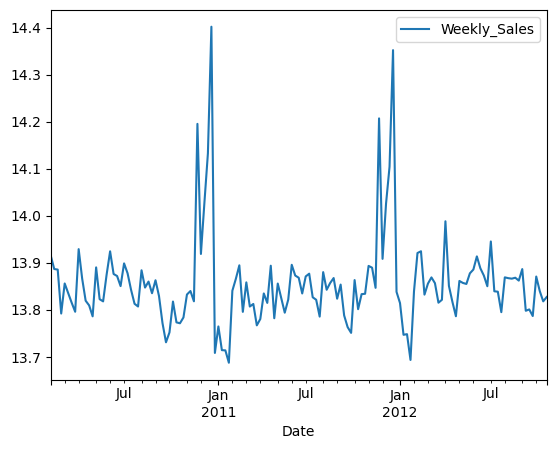

In [18]:
plt.figure(figsize=(20,7))
X.plot()

# Applied Auto-Arima to get P,D,Q - 0,0,2

stepwise_fit = auto_arima(X['Weekly_Sales'], error_action='ignore',
                          trace=True,suppress_warnings=True,seasonal=True,
                          stepwise=True,maxiter=200,return_valid_fits= True,n_fits=20,m=52)

In [19]:
print(X.shape)
train=X.iloc[:-43]
test=X.iloc[-43:]
print(train.shape,test.shape)
train

(143, 1)
(100, 1) (43, 1)


,Weekly_Sales
Date,
2010-02-05,13.915873
2010-02-12,13.887039
2010-02-19,13.885803
2010-02-26,13.792323
2010-03-05,13.856257
...,...
2011-12-02,13.908607
2011-12-09,14.026332
2011-12-16,14.104620


In [20]:
model = sm.tsa.arima.ARIMA(train['Weekly_Sales'], order=(0,0,2))
model = model.fit()
model.summary()

C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                  84.247
Date:                Wed, 12 Apr 2023   AIC                           -160.494
Time:                        20:08:50   BIC                           -150.073
Sample:                    02-05-2010   HQIC                          -156.277
                         - 12-30-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8598      0.025    545.792      0.000      13.810      13.910
ma.L1          0.3399      0.075      4.549      0.000       0.193       0.486
ma.L2          0.1854      0.091      2.042      0.041       0.007       0.363
sigma2         0.0108      0.001     11.251      0.000       0.009       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               247.35
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               7.78   Skew:                             1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end).rename('ARIMA Predictions')
pred.index=X.index[start:end+1]
print(pred.shape)

(43,)


In [22]:
test['Pred'] = pred

<Axes: xlabel='Date'>

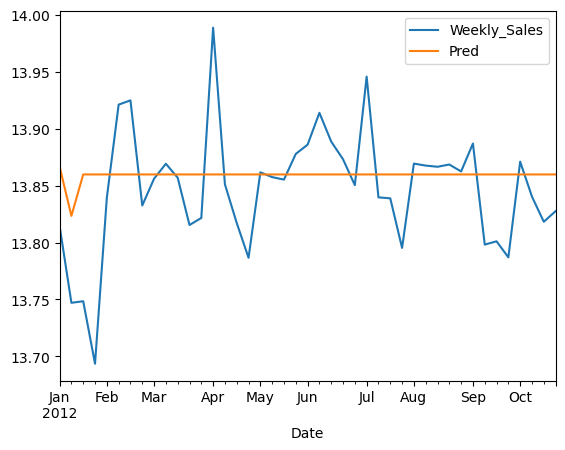

In [23]:
test[['Weekly_Sales','Pred']].plot()

In [24]:
seasonal_model=SARIMAX(train['Weekly_Sales'],order=(0,0,2),seasonal_order=(1,0,2,52))
seasonal_model=seasonal_model.fit()

C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [25]:
start=len(train)
end=len(train)+len(test)-1
seasonal_pred=seasonal_model.predict(start=start,end=end).rename('ARIMA Predictions')
seasonal_pred.index=X.index[start:end+1]
seasonal_pred.dtypes

dtype('float64')

In [26]:
test['seasonal pred'] = seasonal_pred
test['seasonal pred'] = np.exp(test['seasonal pred'])
test['Weekly_Sales'] = np.exp(test['Weekly_Sales'])


<Axes: xlabel='Date'>

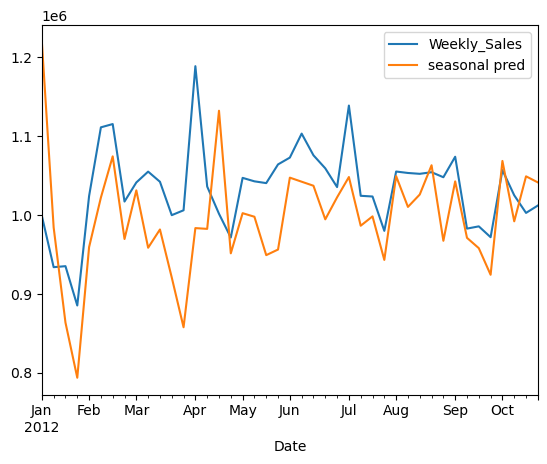

In [27]:
test[['Weekly_Sales','seasonal pred']].plot()


inverse = scale.inverse_transform(test)


test['Weekly_Sales']=inverse[:,0]
test['seasonal pred'] = inverse[:,2]

In [28]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
print(mean_absolute_error(test['seasonal pred'],test['Weekly_Sales']))
print(mean_absolute_percentage_error(test['seasonal pred'],test['Weekly_Sales']))

59726.76668597811
0.06035227291556579


In [29]:
def smape(actual, forecast):
    
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast))) * 100
smape(test['Weekly_Sales'],test['seasonal pred'])

5.884505750960687

<Axes: xlabel='Date'>

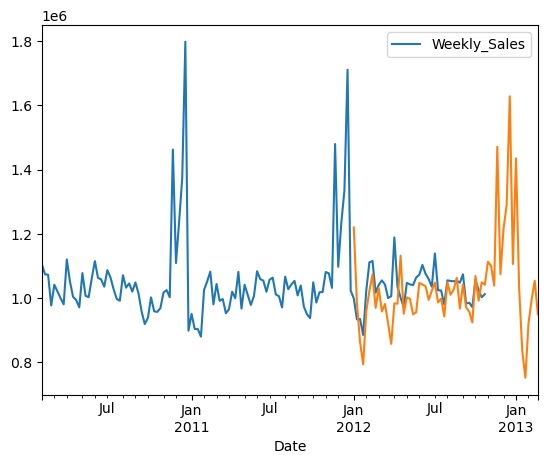

In [30]:
forecast = seasonal_model.forecast(steps=60)
forecast = np.exp(forecast)
X = np.exp(X)
X.plot()
forecast.plot()

C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

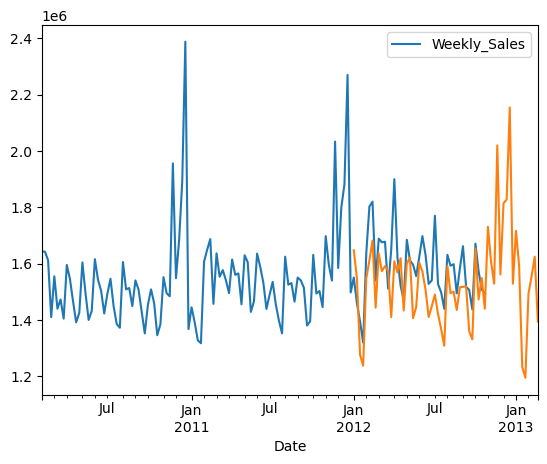

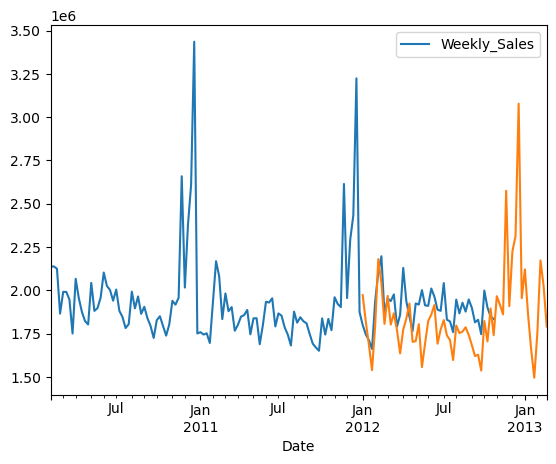

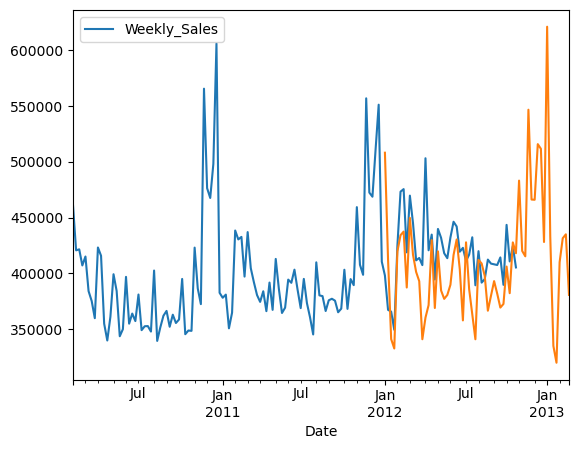

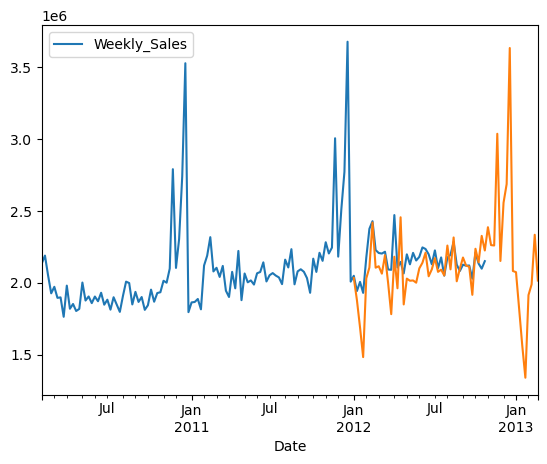

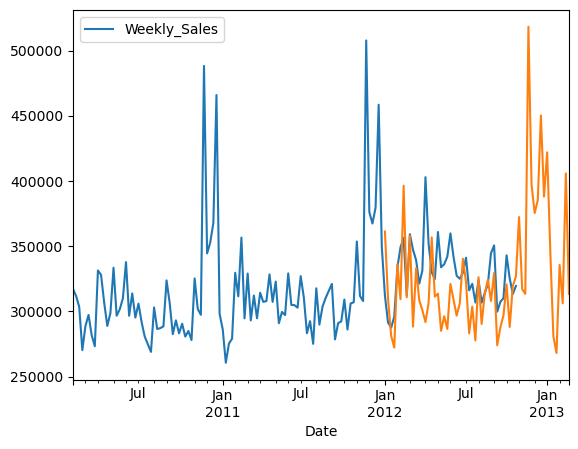

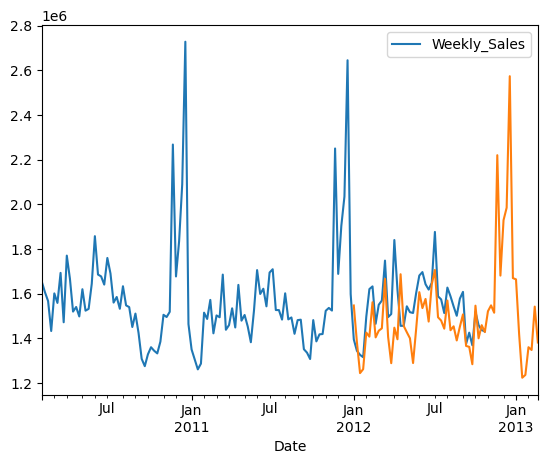

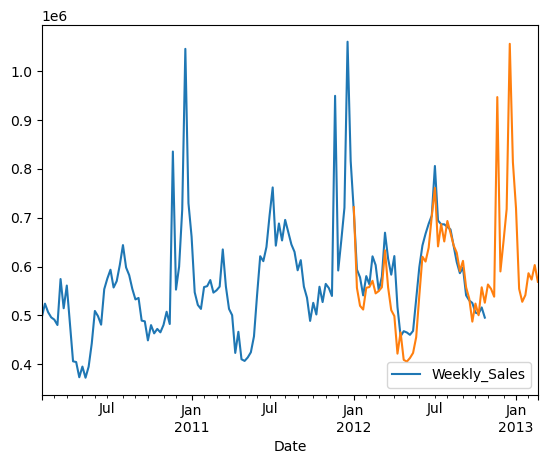

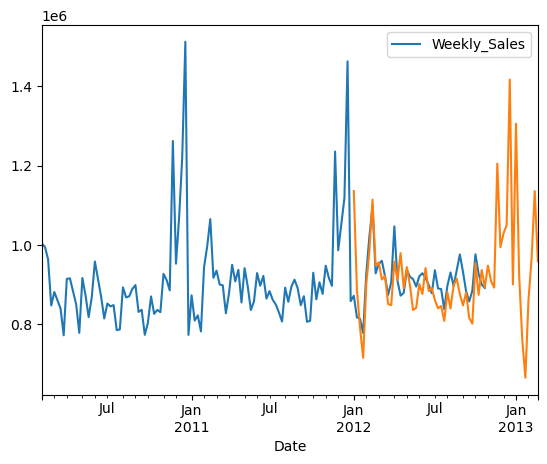

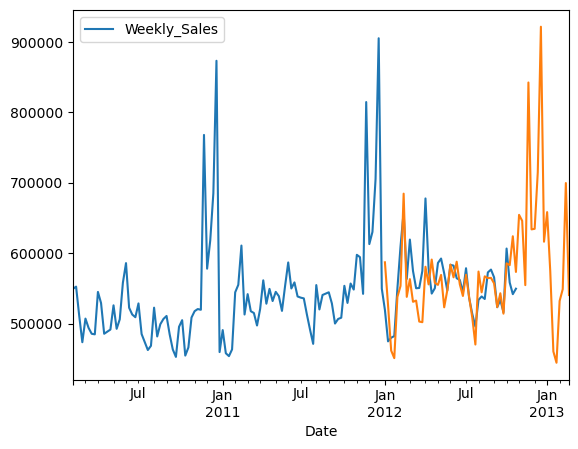

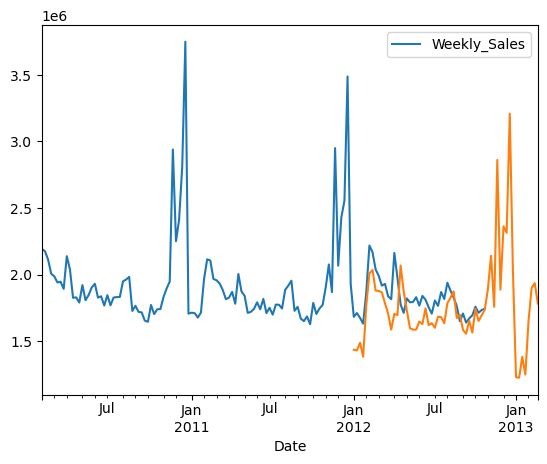

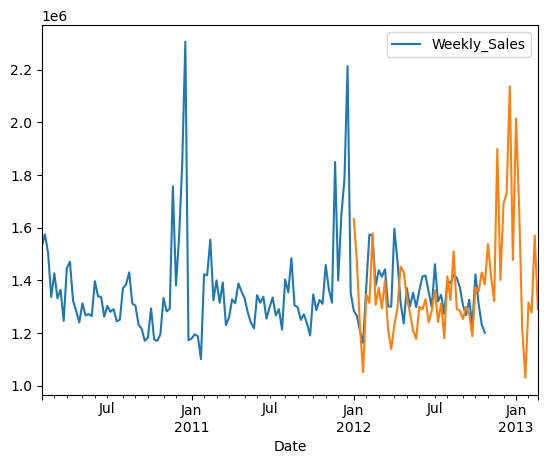

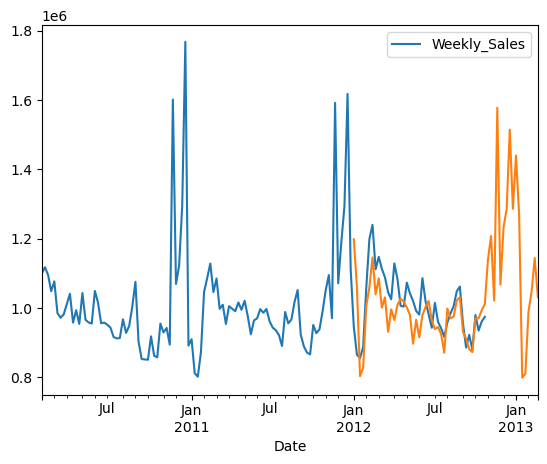

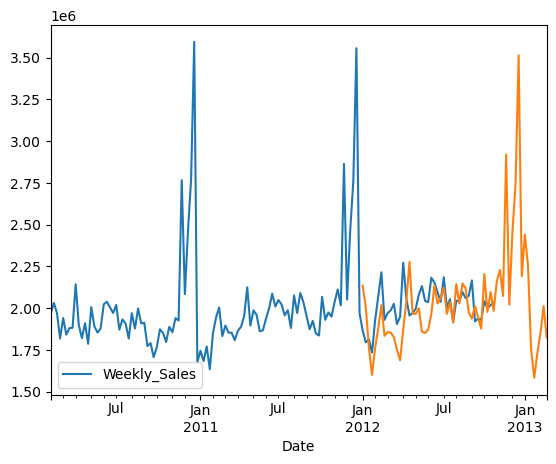

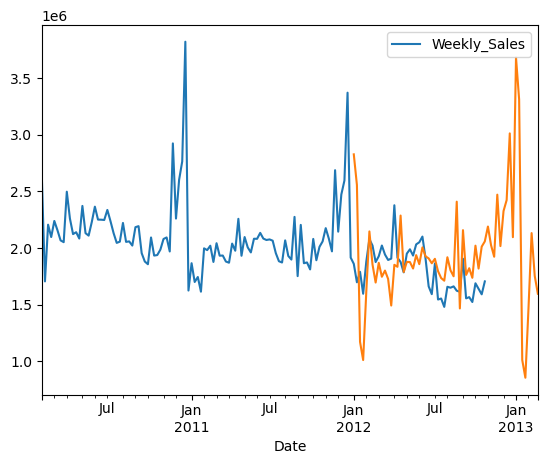

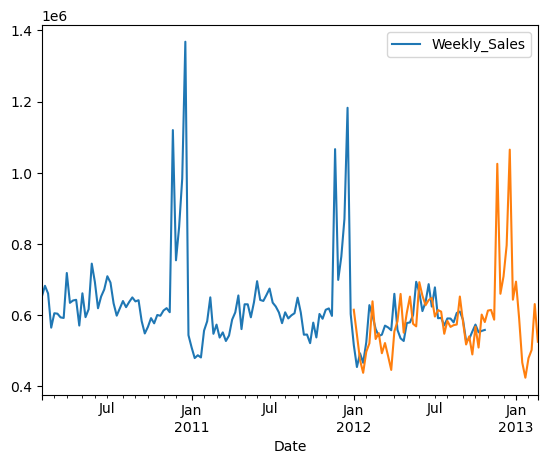

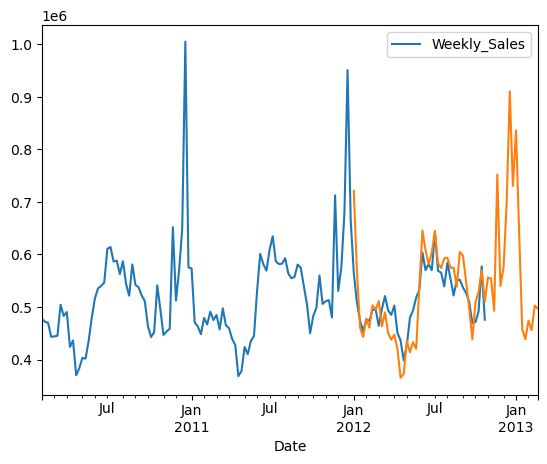

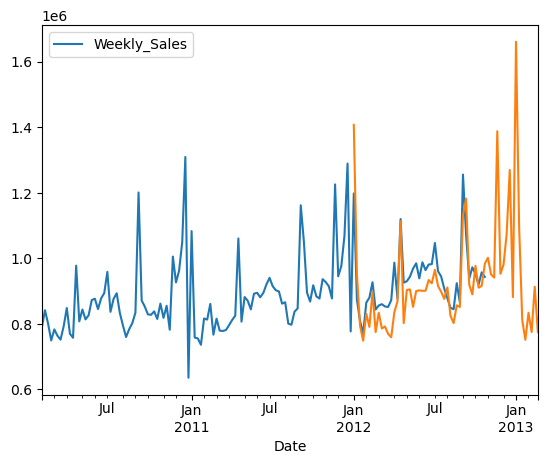

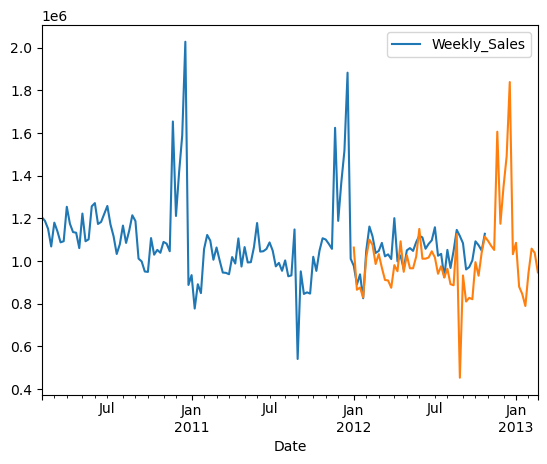

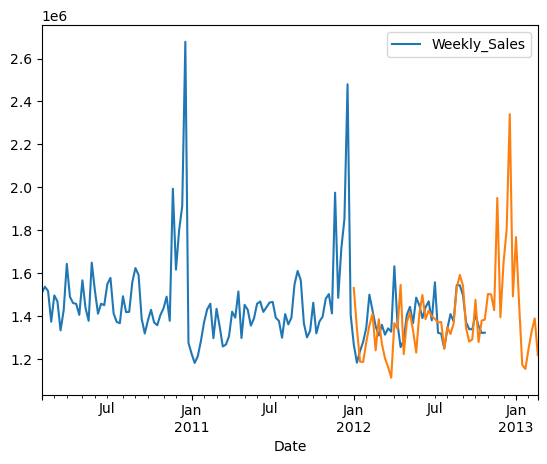

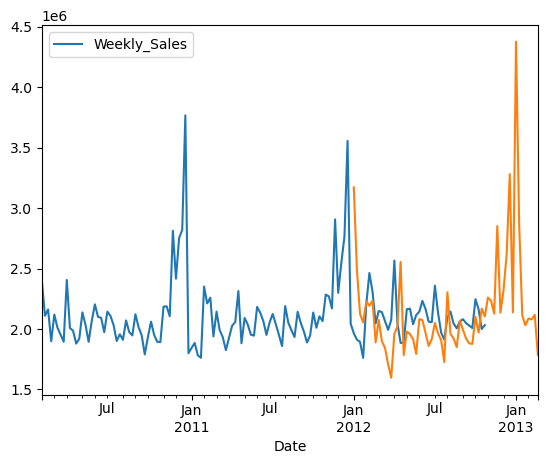

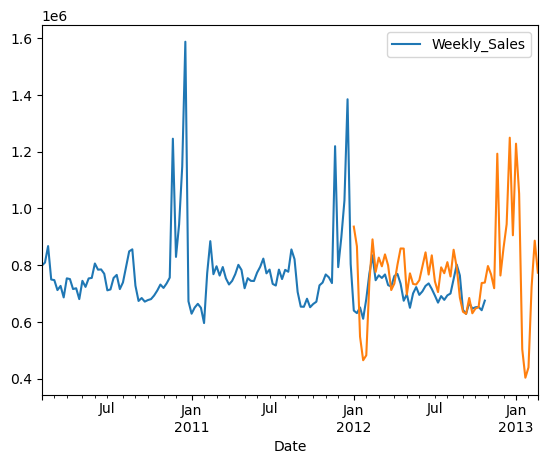

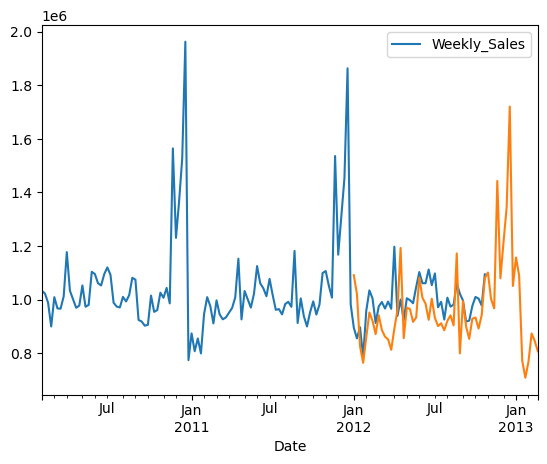

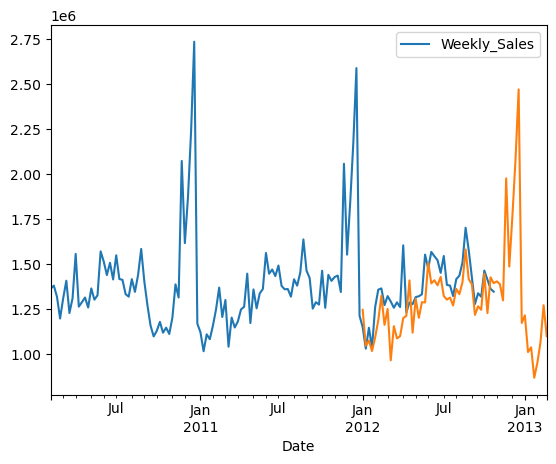

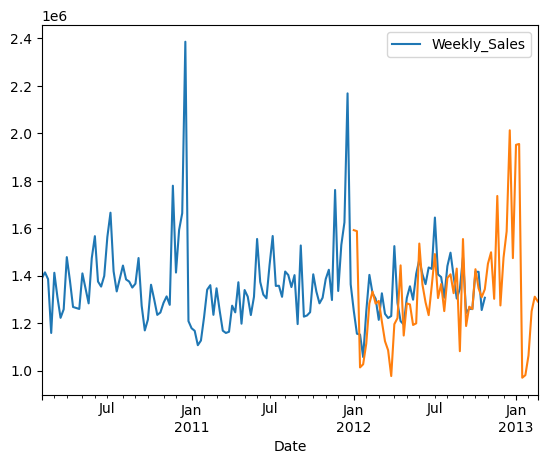

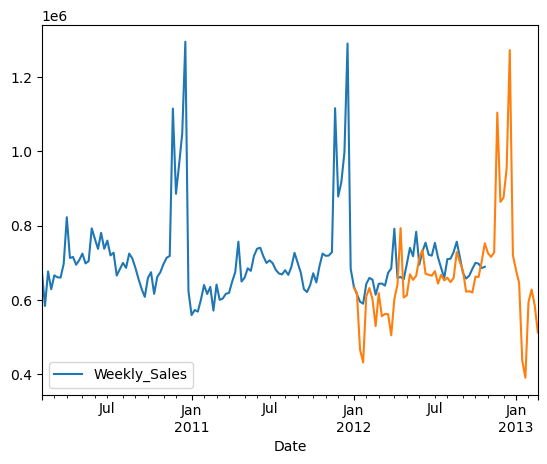

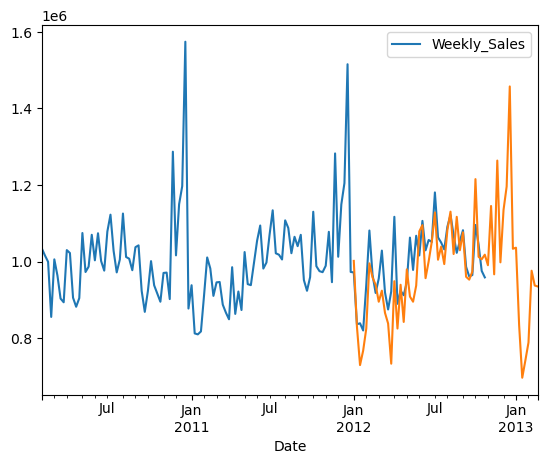

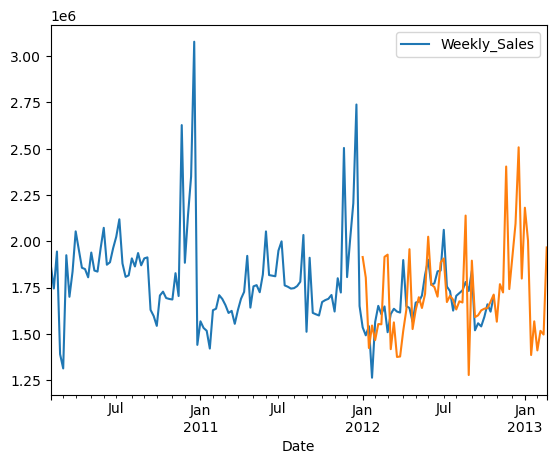

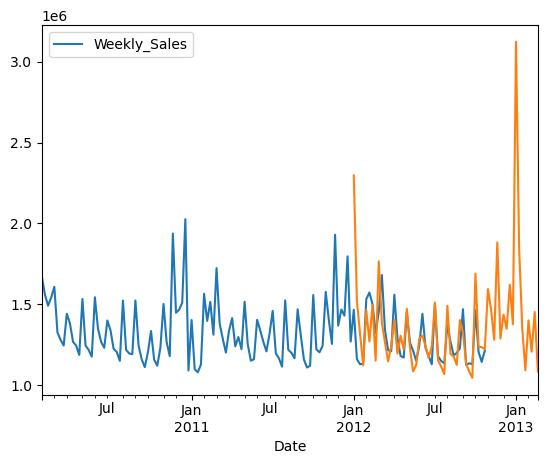

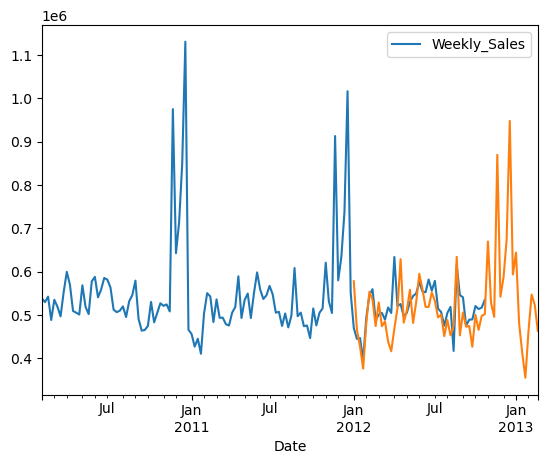

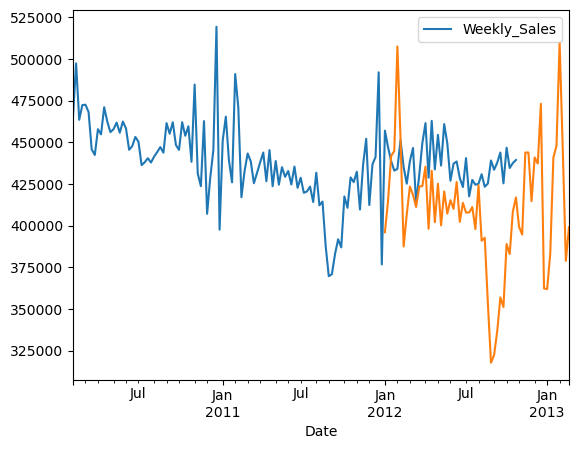

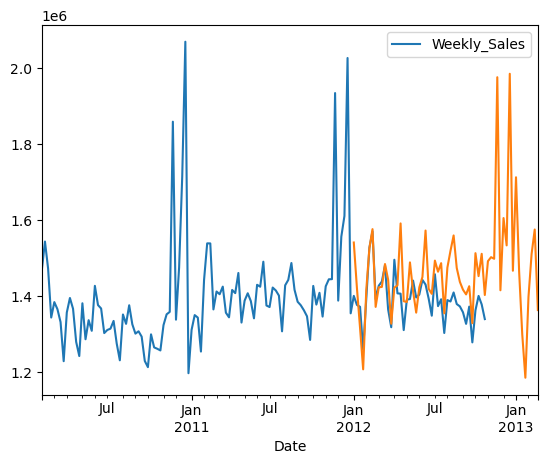

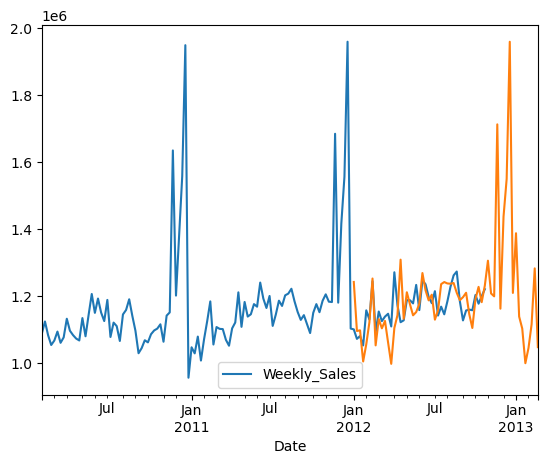

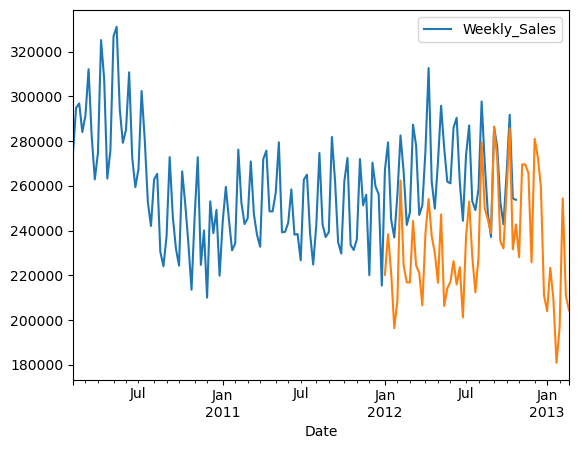

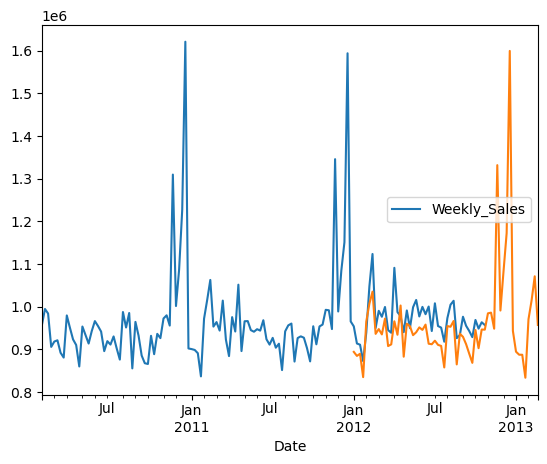

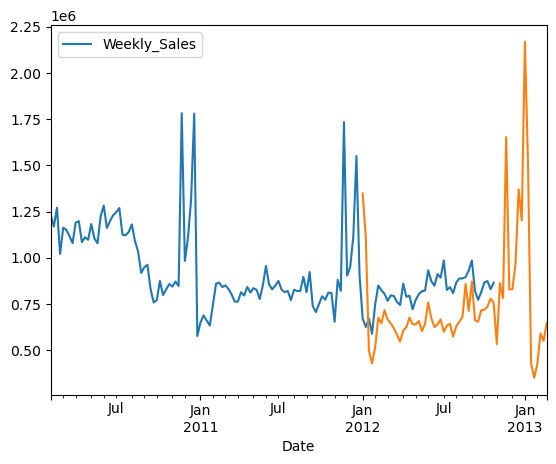

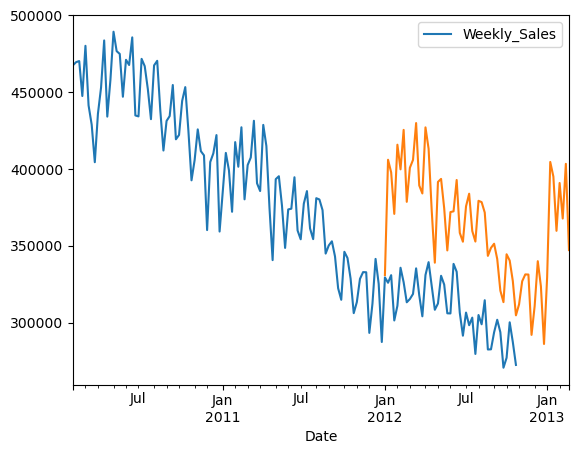

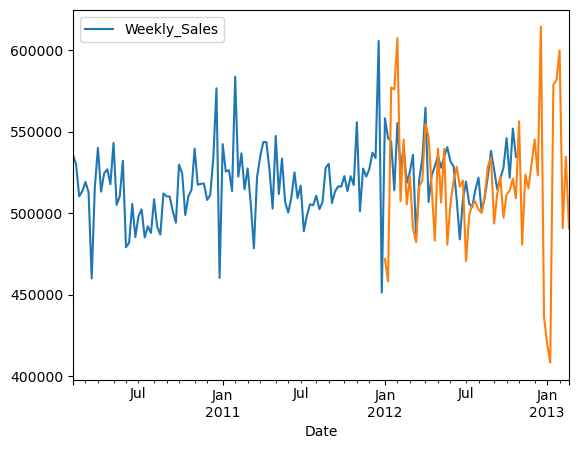

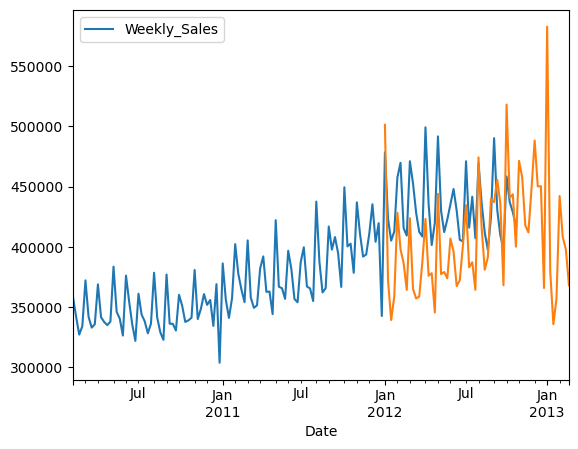

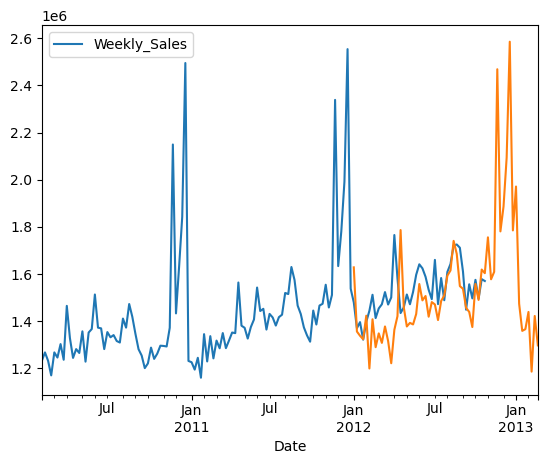

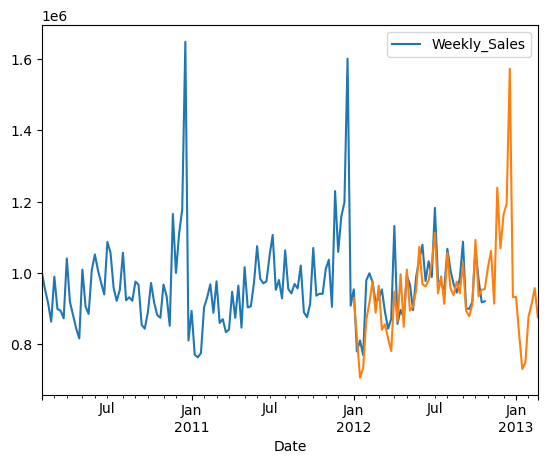

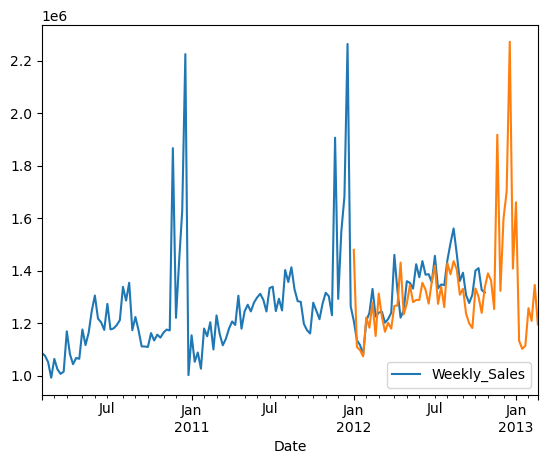

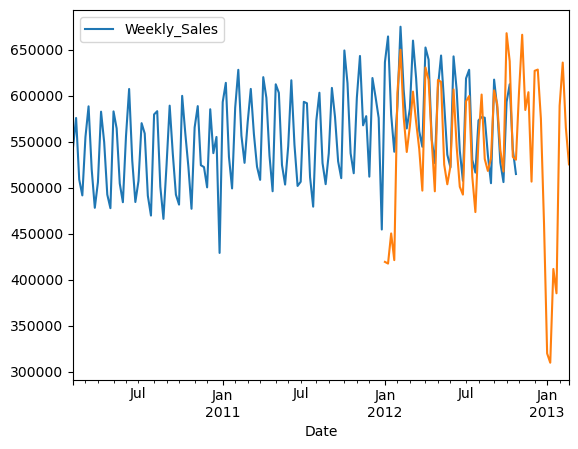

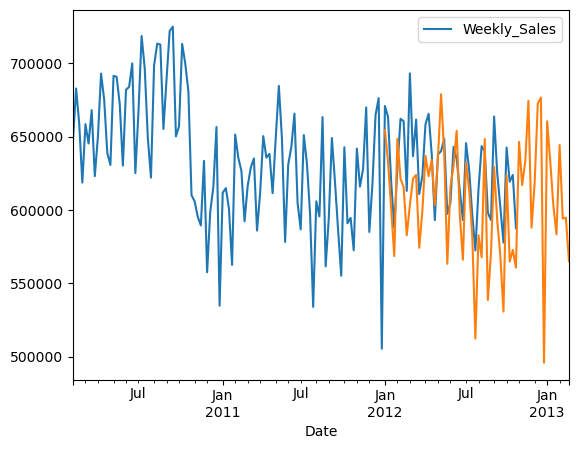

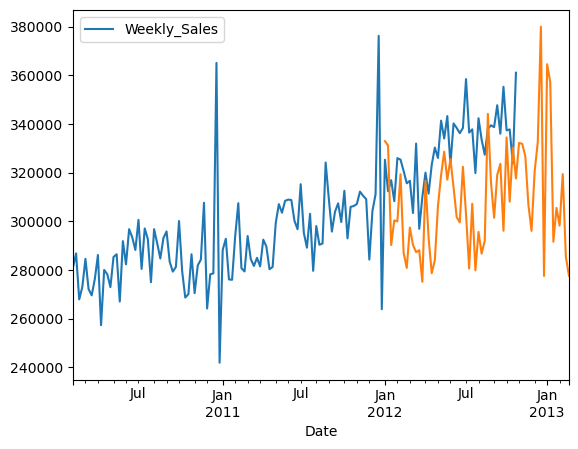

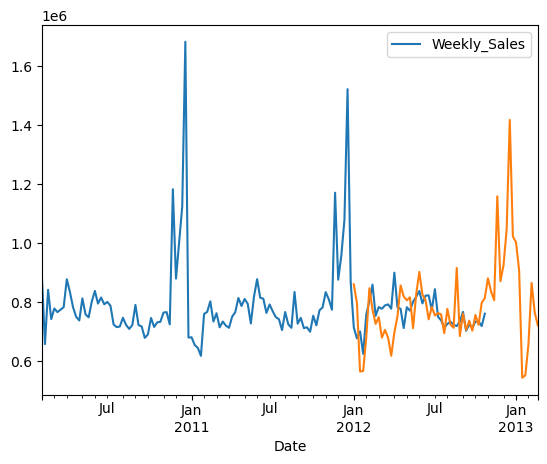

In [31]:
pred_data = pd.DataFrame()
forcest_data = pd.DataFrame()
test_forcast = pd.DataFrame()
for i in range(1,46):
    df_forcast = df[df['Store']  == i]
    df_forcast = df_forcast.set_index(df_forcast['Date'])
    df_forcast = df_forcast.iloc[:,2]
    df_forcast = pd.DataFrame(df_forcast)
    df_forcast = np.log(df_forcast)
    #scaled = scale.fit_transform(df_forcast)
    #df_forcast['Weekly_Sales'] = scaled 
    #df_forcast.plot()
    #print(df_forcast.shape)
    train_forcast=df_forcast.iloc[:-43]
    test_forcast[f'Weekly_Sales_{i}']=df_forcast.iloc[-43:]
    #print(train_forcast.shape,test_forcast.shape)
    seasonal_model_forcast=SARIMAX(train_forcast['Weekly_Sales'],order=(0,0,2),seasonal_order=(1,0,2,52))
    seasonal_model_forcast=seasonal_model_forcast.fit()
    start=len(train_forcast)
    end=len(train_forcast)+len(test_forcast)-1
    seasonal_pred_forcast=seasonal_model_forcast.predict(start=start,end=end).rename('SARIMAX Predictions')
    seasonal_pred_forcast.index=df_forcast.index[start:end+1]
    seasonal_pred_forcast.dtypes
    pred_data[f'sales_pred_{i}'] = seasonal_pred_forcast
    pred_data[f'sales_pred_{i}'] = np.exp(pred_data[f'sales_pred_{i}'])
    test_forcast[f'Weekly_Sales_{i}'] = np.exp(test_forcast[f'Weekly_Sales_{i}'])
    #test_forcast[f'Weekly_Sales_{i}'].plot()
    #pred_data[f'sales_pred_{i}'].plot()
    #rmse=sqrt(mean_squared_error(pred_data[f'sales_pred_{i}'],test_forcast[f'Weekly_Sales_{i}']))
    #print(rmse)
    #print(smape(test_forcast[f'Weekly_Sales_{i}'],pred_data[f'sales_pred_{i}']))
    forecast_sales = seasonal_model_forcast.forecast(steps=60)
    df_forcast = np.exp(df_forcast)
    forcest_data[f'sales_forcast_{i}'] = forecast_sales
    forcest_data[f'sales_forcast_{i}']= np.exp(forcest_data[f'sales_forcast_{i}'])
    df_forcast.plot()
    forcest_data[f'sales_forcast_{i}'].plot()

In [33]:
forcest_data.iloc[-12:]

,sales_forcast_1,sales_forcast_2,sales_forcast_3,sales_forcast_4,sales_forcast_5,sales_forcast_6,sales_forcast_7,sales_forcast_8,sales_forcast_9,sales_forcast_10,...,sales_forcast_36,sales_forcast_37,sales_forcast_38,sales_forcast_39,sales_forcast_40,sales_forcast_41,sales_forcast_42,sales_forcast_43,sales_forcast_44,sales_forcast_45
2012-12-07,1.814057e+06,2.224886e+06,466049.095396,2.555726e+06,375473.582075,1.928873e+06,6.518441e+05,1.029241e+06,634776.878893,2.363395e+06,...,310830.427936,545312.778572,488310.347140,1.886072e+06,1.163758e+06,1.599581e+06,626975.024281,618590.735542,320574.683026,9.247226e+05
2012-12-14,1.827402e+06,2.312672e+06,515885.531826,2.685969e+06,385343.193590,1.984769e+06,7.173539e+05,1.049828e+06,715144.001661,2.313892e+06,...,340020.510610,523240.405720,450207.532415,2.093607e+06,1.194477e+06,1.701698e+06,628307.895027,672737.613367,332638.344824,1.046402e+06
2012-12-21,2.154265e+06,3.078207e+06,511706.413658,3.632604e+06,450369.148191,2.573269e+06,1.055445e+06,1.416305e+06,921700.575060,3.208634e+06,...,323727.105479,614536.996559,450392.839802,2.585947e+06,1.573372e+06,2.272310e+06,574892.307743,676690.801203,379976.460119,1.417657e+06
2012-12-28,1.528212e+06,1.954158e+06,428208.454336,2.081233e+06,388080.708919,1.669705e+06,8.135997e+05,9.006050e+05,616449.702171,2.036578e+06,...,286132.137035,436583.360621,365873.630905,1.784438e+06,9.334011e+05,1.407718e+06,460863.793757,495837.033305,277571.075706,1.022162e+06
2013-01-04,1.715884e+06,2.120824e+06,621081.018690,2.072774e+06,422065.053172,1.664003e+06,7.192281e+05,1.305276e+06,658478.440601,1.230713e+06,...,329609.595937,420003.005556,582745.806855,1.970865e+06,9.333572e+05,1.660476e+06,319632.258871,660559.805794,364563.633869,1.002873e+06
2013-01-11,1.590806e+06,1.864073e+06,433191.178722,1.818091e+06,346961.782310,1.418397e+06,5.544417e+05,9.245822e+05,574526.233181,1.226191e+06,...,404603.560657,408285.588700,379408.374560,1.472994e+06,8.292424e+05,1.132187e+06,309570.235107,633126.867713,357173.660813,9.066952e+05
2013-01-18,1.232698e+06,1.660282e+06,335111.822606,1.563107e+06,280809.167982,1.223869e+06,5.279112e+05,7.625031e+05,460587.419945,1.382665e+06,...,395096.369779,579023.228677,335893.854465,1.357687e+06,7.311545e+05,1.102038e+06,411525.246491,602921.170058,291645.687710,5.430695e+05
2013-01-25,1.194481e+06,1.494742e+06,320044.869841,1.338476e+06,268088.049025,1.236376e+06,5.415745e+05,6.656993e+05,444648.267844,1.249790e+06,...,359782.933237,581870.219058,357157.287617,1.364941e+06,7.490853e+05,1.113655e+06,385063.031147,583392.048435,305559.417732,5.513980e+05
2013-02-01,1.493658e+06,1.754731e+06,410070.811851,1.913488e+06,335626.675891,1.360433e+06,5.863287e+05,8.618389e+05,532323.728926,1.646953e+06,...,390913.492853,599970.820311,442267.156134,1.438075e+06,8.777547e+05,1.257000e+06,588880.146527,644360.328991,298236.247866,6.585314e+05
2013-02-08,1.555491e+06,2.172478e+06,431583.115393,1.987465e+06,306221.959080,1.348075e+06,5.733613e+05,9.655524e+05,549053.437132,1.901130e+06,...,367768.841860,490901.026890,408383.596163,1.184570e+06,9.129395e+05,1.208758e+06,635956.570916,594215.268425,319422.126095,8.646888e+05
